# Customer classification

A grocery store wants to know its customers better in order to create personalized marketing
campaigns. You are asked to develop a classification model using Keras that takes into account
customers' shopping frequency, their spending habits and the maximum amount they spend in the
store. The goal of the model is to classify customers into three categories: low, medium and high
value.

Attached training data in a file named data_customer_classification

In [2]:
import pandas as pd
import numpy as np

In [2]:
df_customer = pd.read_excel(r'/home/djm/Documents/Projects/GBM/excersice_4/data/data_customer_classification 1.xlsx', index_col=0)

In [3]:
df_customer.head()

,trans_date,tran_amount
customer_id,,
CS5295,2013-02-11,35
CS4768,2015-03-15,39
CS2122,2013-02-26,52
CS1217,2011-11-16,99
CS1850,2013-11-20,78


In [4]:
df_customer.shape

(125000, 2)

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125000 entries, CS5295 to CS7996
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   trans_date   125000 non-null  datetime64[ns]
 1   tran_amount  125000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.9+ MB


There are no null-values

In [6]:
df_customer.describe()

,trans_date,tran_amount
count,125000,125000.000000
mean,2013-04-13 12:01:16.031999744,64.991912
min,2011-05-16 00:00:00,10.000000
25%,2012-04-29 00:00:00,47.000000
50%,2013-04-14 00:00:00,65.000000
75%,2014-03-28 00:00:00,83.000000
max,2015-03-16 00:00:00,105.000000
std,NaN,22.860006


The data is between 2011 and 2015. The distribution of the amount is spread.


In [7]:
df_customer.index.unique().size

6889

There are 6889 customers

Let's get spending habits
1) Frequency of purchase per month

In [8]:
df_customer['month'] = df_customer['trans_date'].dt.month
df_customer['year'] = df_customer['trans_date'].dt.year
df_customer['day_of_week'] = df_customer['trans_date'].dt.day_of_week.astype('str')

In [9]:
df_customer['monthly_freq'] = df_customer.groupby(['customer_id','month','year'])['tran_amount'].transform('count')
df_customer['monthly_freq'].describe()

count    125000.000000
mean          1.397520
std           0.634701
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: monthly_freq, dtype: float64

Almost all the customers make one purchase per month

2) Average amount purchased per month

In [10]:
df_customer['average_amount_montly'] = df_customer.groupby(['customer_id','month','year'])['tran_amount'].transform('mean')
df_customer['average_amount_montly'].describe()

count    125000.000000
mean         64.991912
std          21.205402
min          10.000000
25%          50.000000
50%          65.875000
75%          81.000000
max         105.000000
Name: average_amount_montly, dtype: float64

3) Max amount purchased per month

In [11]:
df_customer['max_amount_monthly'] = df_customer.groupby(['customer_id','month','year'])['tran_amount'].transform('max')
df_customer['max_amount_monthly'].describe()


count    125000.000000
mean         69.239904
std          22.839310
min          10.000000
25%          52.000000
50%          71.000000
75%          89.000000
max         105.000000
Name: max_amount_monthly, dtype: float64

4) Min amount purchased per month

In [12]:
df_customer['min_amount_monthly'] = df_customer.groupby(['customer_id','month','year'])['tran_amount'].transform('min')
df_customer['min_amount_monthly'].describe()

count    125000.000000
mean         60.720696
std          22.327449
min          10.000000
25%          44.000000
50%          59.000000
75%          77.000000
max         105.000000
Name: min_amount_monthly, dtype: float64

5) Total amount purchased per month

In [13]:
df_customer['total_amount_monthly'] = df_customer.groupby(['customer_id','month','year'])['tran_amount'].transform('sum')
df_customer['total_amount_monthly'].describe()

count    125000.000000
mean         91.438536
std          51.807893
min          10.000000
25%          55.000000
50%          80.000000
75%         113.000000
max         460.000000
Name: total_amount_monthly, dtype: float64

6) most common day of week for purchase

In [14]:
df_customer['mode_day_of_week'] = df_customer.groupby(['customer_id','year'])["day_of_week"].transform(lambda x: x.mode().iloc[0])
df_customer['mode_day_of_week'].describe()

count     125000
unique         7
top            0
freq       31931
Name: mode_day_of_week, dtype: object

In [18]:
df_customer.head()

,trans_date,tran_amount,month,year,day_of_week,monthly_freq,average_amount_montly,max_amount_monthly,min_amount_monthly,total_amount_monthly,mode_day_of_week
customer_id,,,,,,,,,,,
CS5295,2013-02-11,35,2,2013,0,1,35.0,35,35,35,4
CS4768,2015-03-15,39,3,2015,6,1,39.0,39,39,39,6
CS2122,2013-02-26,52,2,2013,1,1,52.0,52,52,52,6
CS1217,2011-11-16,99,11,2011,2,2,81.0,99,63,162,1
CS1850,2013-11-20,78,11,2013,2,1,78.0,78,78,78,1


Final dataset


In the final dataset we are not interest in keep the 'trans_date', 'tran_amount' and 'day_of_week' because its content is implicit in the created features. Also customer id will be remove due it doesn't provide any relevant information to cluster the customers. 

In [36]:
df_final_data = df_customer.copy()
df_final_data.reset_index(drop=True, inplace=True)
df_final_data.drop(columns=['trans_date', 'tran_amount', 'day_of_week'], inplace=True)
df_final_data.drop_duplicates(inplace=True)

In [37]:
df_final_data.shape

(44903, 8)

In [38]:
df_final_data.head()

,month,year,monthly_freq,average_amount_montly,max_amount_monthly,min_amount_monthly,total_amount_monthly,mode_day_of_week
0,2,2013,1,35.0,35,35,35,4
1,3,2015,1,39.0,39,39,39,6
2,2,2013,1,52.0,52,52,52,6
3,11,2011,2,81.0,99,63,162,1
4,11,2013,1,78.0,78,78,78,1


Since there are no predefined "labels" for each customer, it is not feasible to create a classification model. Without predefined classes, we cannot train a neural network to classify each customer.

Therefore, we will attempt to identify the best possible three clusters using an unsupervised learning approach on the processed dataset.

Given the absence of external data (socio-economic factors), I believe the optimal approach is to calculate three clusters for a maximum time range of two consecutive years. This way, we aim to minimize the impact of unknown variables, such as those that might have been relevant in 2014 and 2015.

Now, let's proceed with data preparation.

In [39]:
df_final_data_2014_2015 = df_final_data[df_final_data['year'] > 2013].reset_index(drop=True)

In [56]:
df_final_data_2014_2015.shape

(14097, 8)

In [40]:
df_final_data_2014_2015.head()

,month,year,monthly_freq,average_amount_montly,max_amount_monthly,min_amount_monthly,total_amount_monthly,mode_day_of_week
0,3,2015,1,39.0,39,39,39,6
1,3,2014,1,81.0,81,81,81,2
2,1,2015,1,89.0,89,89,89,4
3,12,2014,1,78.0,78,78,78,1
4,1,2014,1,98.0,98,98,98,2


In [42]:
from sklearn import preprocessing

standarizing numerical variables

this is required to keep the range of features similar

In [43]:
numeric_columns = ['average_amount_montly', 'max_amount_monthly', 'min_amount_monthly', 'total_amount_monthly', 'monthly_freq']
numeric_input = df_final_data_2014_2015[numeric_columns].to_numpy()
scaler = preprocessing.StandardScaler().fit(numeric_input)
numeric_input_scaled = scaler.transform(numeric_input)
numeric_input_scaled

array([[-1.07482565, -1.19594508, -0.81906196, -1.04733972, -0.75924586],
       [ 0.76345984,  0.49542329,  0.95386545, -0.26055623, -0.75924586],
       [ 1.11360945,  0.8175887 ,  1.29156591, -0.11069271, -0.75924586],
       ...,
       [-2.1252745 , -2.16244129, -1.83216333, -1.49693029, -0.75924586],
       [-0.37452642, -0.55161427, -0.14366104, -0.74761268, -0.75924586],
       [-1.20613175, -1.31675711, -0.94569963, -1.10353854, -0.75924586]])

Let's encode the year column

We apply one-hot encoding due this column have only 2 values (2014 and 2015)

In [47]:
cat_columns_one_hot = ['year']
cat_one_hot_input = df_final_data_2014_2015[cat_columns_one_hot].to_numpy()
scaler = preprocessing.OneHotEncoder().fit(cat_one_hot_input)
cat_one_hot_input_scaled = scaler.transform(cat_one_hot_input).toarray()
cat_one_hot_input_scaled

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

Let's proceed with the remaining categorical columns.

We will not apply one-hot encoding to these columns, as it would result in 20 binary categorical columns. This could lead to a dataset dominated by columns filled with zeros, which can cause correlation issues as per <a href='https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/#h-one-hot-encoding'>Analytics Vidhya.</a>

Moreover, the scale of these columns (ranging from 0 to 12) does not differ significantly in magnitude from the rest of the data.


In [50]:
cat_columns = ['month', 'mode_day_of_week']
cat_input = df_final_data_2014_2015[cat_columns].to_numpy().astype(int)
cat_input

array([[ 3,  6],
       [ 3,  2],
       [ 1,  4],
       ...,
       [ 7,  2],
       [ 8,  2],
       [12,  5]])

Joining the arrays to get the training dataset

In [54]:
X_data = np.concatenate((numeric_input_scaled,cat_one_hot_input_scaled,cat_input), axis=1)

In [55]:
X_data.shape

(14097, 9)

Saving dataset (cleaning the memory to the following training process)

In [59]:
np.savetxt('/home/djm/Documents/Projects/GBM/excersice_4/data/training_data.csv', X_data, delimiter = ',')

## Training
Let's train the unsupervised model, in this case K-means is a good fit because we would like to have 3 classes

In [3]:
import pandas as pd
import numpy as np

In [6]:
X_data = np.genfromtxt('/home/djm/Documents/Projects/GBM/excersice_4/data/training_data.csv', delimiter=",")
X_data.shape

(14097, 9)

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto').fit(X_data)
labels = kmeans.labels_

In [31]:
import seaborn as sns

In [32]:
columns = ['average_amount_montly', 'max_amount_monthly', 'min_amount_monthly', 'total_amount_monthly', 'monthly_freq', 'year_2014', 'year_2015','month', 'mode_day_of_week', 'label']
clustered_data = np.concatenate((X_data, np.expand_dims(labels, axis=1)), axis=1)
df_clustered_data = pd.DataFrame(clustered_data, columns=columns)

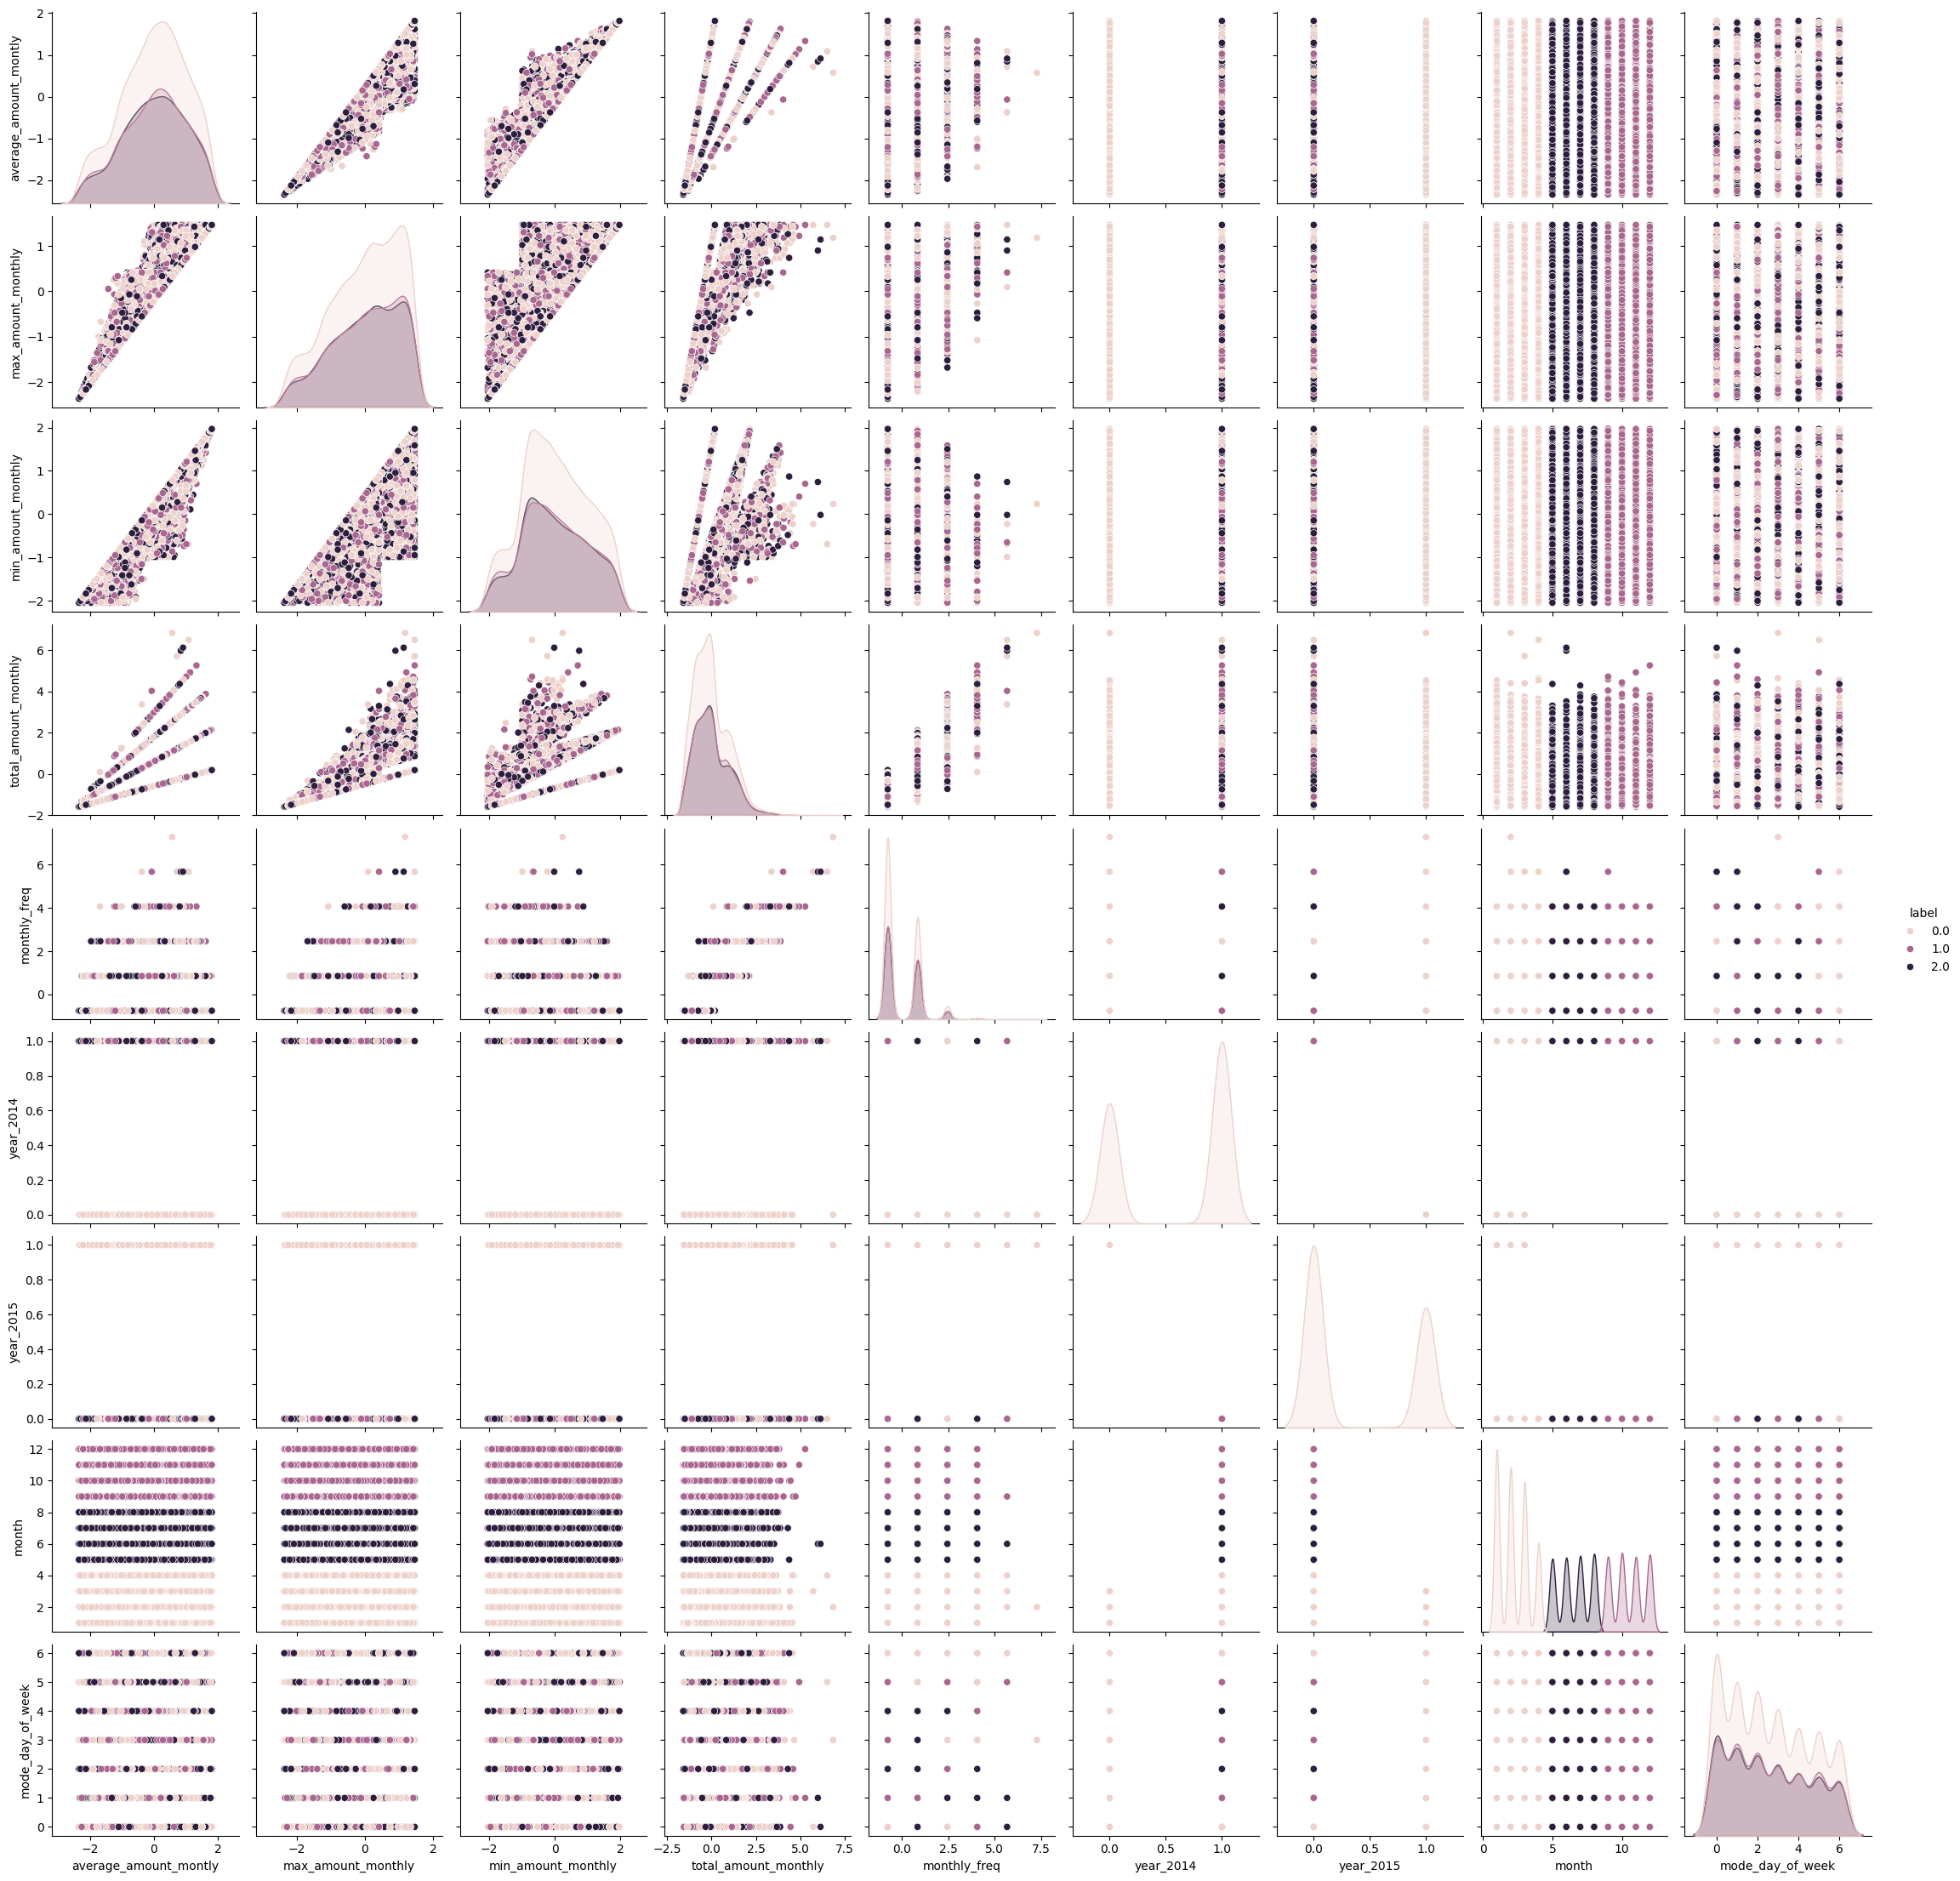

In [33]:
sns.pairplot(df_clustered_data, hue="label")

## Conclusion

The K-means model did not perform well in this instance. In the first quadrant of the chart, we observe significant covariance between features. This is likely due to the majority of customers making only one purchase per month, resulting in close values for the maximum, total, minimum, and average.

In the second quadrant, the model appears to cluster customers based on the month. This could indicate a seasonal frequency. However, I have reservations about this interpretation and suggest training the model without considering the month.

The initial iteration did not yield satisfactory results. For future work, consider the following:

1) Optimize the cluster parameter. We are currently unsure if 3 is the optimal number of clusters.
2) Collect additional customer-related features such as age, location, income, and payment method.
3) Gather more information about the purchases, including product category, price, quantity, and method of purchase (online or in-store).
4) Experiment with other clustering techniques such as DBSCAN and Agglomerative Clustering.
5) Once the classes are defined, proceed to train a classification model such as Naive Bayes, Decision Tree, or ensemble models like XGBoost.


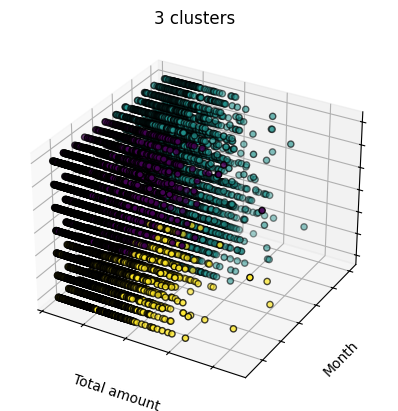

In [29]:
import matplotlib.pyplot as plt

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


fig = plt.figure((10,8))
ax = fig.add_subplot(projection='3d')
title = "3 clusters"

ax.scatter(X_data[:, 3], X_data[:, 7], X_data[:, 8], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Total amount")
ax.set_ylabel("Month")
ax.set_zlabel("Day of week")
ax.set_title(title)

plt.show()